<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Metode Komputasi Eksplorasi menggunakan Python
*Oleh Mark Bakker*

## Notebook 5: Data Seri Waktu (*Time series*) dan Pandas

In [1]:
# Kita mungkin akan memerlukan ini:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Pemuatan data real dengan Pandas

Real data seringkali disimpan dalam file CSV (*Comma Separated Values*).
Sejauh ini, CSV files sudah dimuat melalui perintah `np.loadtxt`.
Fungsi `loadtxt` memiliki beberapa kegunaan dasar dan bekerja dengan baik, tetapi saat kita memiliki dataset yang lebih rumit, kita pasti juga ingin kegunaan yang lebih mutakhir. 
Paket fungsi yang paling canggih dan hebat untuk penanganan dan analisis data adalah `pandas`. Di sini kita hanya akan menggunakan sedikit fungsi dari paket `pandas`. Informasi selengkapnya untuk `pandas` dapat dilihat di [pandas website](http://pandas.pydata.org/).

Tinjaulah dataset berikut ini, yang disimpan di dalam file `transport.csv`. Data tersebut memperlihatkan persentase jarak transportasi (dalam kilometer) dari tiap moda; mobil, ojek, atau spaceship dari tiga negara dan satu plane. Dataset tersebut memiliki 4 kolom.
`negara, mobil, ojek, spaceship`  
`penjelasan lain, blablabla`  
`Indonesia, 86.1, 5.3, 8.6`  
`Malaysia, 85.2, 7.1, 7.7`  
`Vietnam, 86.4, 4.6, 9`  
`Mars, 88.2, 6.5, 5.3` 

Dokumen data ini dimuat melalui fungsi `read_csv` dari paket `pandas`. Fungsi `read_csv` meiliki banyak pilihan. Kita hanya akan menggunakan tiga saja di sini. Baris-baris yang harus dilewatkan telah didefinisikan melalui kata kunci `skiprows` (dalam kasus ini, baris 1 melalui teks `bla bla bla`). Kata kunci `skipinitialspace` telah diatur bernilai benar atau `True` sehingga kolom berjudul "mobil" dapat dimuat tanpa ruang awal (*initial space*) yang ada dalam dokumen data. Dan, kata kunci `index_col`  telah diatur sedemikian sehingga mengindikasikan nama-nama di kolom 0  dapat digunakan sebagai indeks untuk memilih sebuah baris.

In [4]:
from pandas import read_csv
tran = read_csv('transport.csv', skiprows=[1], skipinitialspace=True, index_col=0)

Segera sesaat Anda telah memuat data tersebut, Anda dapat menampilkannya di layar.

In [5]:
print(tran)

           Mobil  Ojek  Spaceship
Negara                           
Indonesia   86.1   5.3        8.6
Malaysia    85.2   7.1        7.7
Vietnam     86.4   4.6        9.0
Mars        88.2   6.5        5.3


Meskipun kerangka data (*DataFrame*) yang dimiliki besar,  Anda masih dapat menampilkannya di layar (`pandas` cukup pintar untuk tidak menampilkan keseluruhan kerangka data saat ukurannya terlalu besar), atau Anda dapat dengan mudah menampilkan 5 baris pertama saja dari kerangka data dengan menggunakan fungsi `.head()`.

###Dasar Manipulasi Kerangka Data (*DataFrame*)

Fungsi `read_csv` mengembalikan apa yang dimaksud dengan kerangka data atau *DataFrame*. Variabel `tran` dalam kode di atas sekarang menjadi *DataFrame*. Baris dan kolom dari *DataFrame* dapat memiliki nama, seperti yang dapat Anda lihat saat menampilkan *DataFrame* ke layar. Untuk mencari tahu nama-nama mana saja yang digunakan untuk kolom-kolom tersebut, gunakanlah fungsi `keys`, yang dapat diakses melalui penulisan titik (*dot syntax*). Anda dapat membuat loop melalui seluruh nama kolom sesuai dengan yang Anda inginkan.

In [6]:
print('Nama kolom:')
print(list(tran.keys()))
for key in list(tran.keys()):
    print(key)

Nama kolom:
['Mobil', 'Ojek', 'Spaceship']
Mobil
Ojek
Spaceship


Setiap *DataFrame* dapat diberikan indeks sama seperti array, dengan cara memperinci nomor baris dan kolom menggunakan pernyataan `.iloc` (merupakan singkatan dari *index location* atau lokasi indeks), di mana kolom 0 addalah kolom dengan label `mobil` (karena kolom dengan label `negara` sudah disimpan sebagai indeks ketika membaca dokumen csv; lebih jauh mengenai hal ini di bagian selanjutnya)

In [8]:
print(tran.iloc[0,1])  # Memberikan data ojek untuk Indonesia
print(tran.iloc[1,0])  # Memberikan data ojek untuk Malaysia
print(tran.iloc[2,2])  # Memberikan data ojek untuk Vietnam
print(tran.iloc[3])  # Seluruh data untuk Mars
print(tran.iloc[:,1])  # Seluruh data untuk ojek

5.3
85.2
9.0
Mobil        88.2
Ojek          6.5
Spaceship     5.3
Name: Mars, dtype: float64
Negara
Indonesia    5.3
Malaysia     7.1
Vietnam      4.6
Mars         6.5
Name: Ojek, dtype: float64


Sebagai alternatif, nilai-nilai pada *DataFrame* dapat dipilih dengan memperinci indeks sesuai nama, dengan menggunakan sintaks `.loc`. Penulisan ini lebih banyak tetapi *sangat* lebih eksplisit. Kode sel yang mirip dengan sel di atas, tetapi menggunakan indeks adalah:

In [10]:
print(tran.loc['Indonesia','Ojek'])
print(tran.loc['Malaysia','Mobil'])
print(tran.loc['Vietnam','Spaceship'])
print(tran.loc['Mars'])
print(tran.loc[:,'Ojek'])



5.3
85.2
9.0
Mobil        88.2
Ojek          6.5
Spaceship     5.3
Name: Mars, dtype: float64
Negara
Indonesia    5.3
Malaysia     7.1
Vietnam      4.6
Mars         6.5
Name: Ojek, dtype: float64


Ada dua cara alternatif untuk mengakses seluruh data dalam kolom. Pertama, Anda dapat memperinci nama kolom sebagai sebuah indeks, tanpa harus menggunakan sintaks `.loc`. Kedua, penulisan titik (*dot syntax*) dapat digunakan, seperti sintaks `.column_name`, di mana `.column_name` adalah nama dari kolom tersebut. Dengan demikian, ketiga pernyataan di bawah akan jadi serupa:

In [11]:
print(tran.loc[:,'Mobil'])  # Seluruh baris dari kolom "mobil"
print(tran['Mobil'])  # kolom 'mobil' 
print(tran.Mobil)

Negara
Indonesia    86.1
Malaysia     85.2
Vietnam      86.4
Mars         88.2
Name: Mobil, dtype: float64
Negara
Indonesia    86.1
Malaysia     85.2
Vietnam      86.4
Mars         88.2
Name: Mobil, dtype: float64
Negara
Indonesia    86.1
Malaysia     85.2
Vietnam      86.4
Mars         88.2
Name: Mobil, dtype: float64


###Fungsi `numpy` untuk DataFrame

Sebuah seri dapat diperlakukan sama dengan array, terutama saat sama-sama mengandung data di dalamnya. Banyak fungsi `numpy` juga berlaku untuk *DataFrame*, tapi fungsi-fungsi tersebut dapat juga diakses melalui *dot syntax*, seperti `dataframe_name.function()`. Ketik saja

`tran.` 

dalam sebuah sel kode dan tekan tombol [tab] untuk melihat seluruh fungsi yang tersedia. Dalam sel kode di bawah ini, kita menghitung nilai maksimum dari transportasi yang  menggunakan mobil, negara yang terkait dengan nilai maksimum transportasi yang menggunakan mobil, dan nilai rata-rata dari seluruh transportasi yang menggunakan mobil. Anda juga dapat menemukan seluruh nilai yang lebih besar dari nilai yang kita tentukan sebelumnya, sama seperti pada array:

In [14]:
print('Persentase jam maksimum untuk perjalanan menggunakan mobil:', tran.Mobil.max())
print('negara dengan persentase perjalanan tertinggi menggunakan mobil:', tran.Mobil.argmax())
print('rata-rata persentase perjalanan menggunakan mobil:', tran.Mobil.mean())
print('seluruh perjalanan menggunakan kereta yang ada di atas 8%:')
print(tran.Spaceship[ tran.Spaceship > 8 ])

Persentase jam maksimum untuk perjalanan menggunakan mobil: 88.2
negara dengan persentase perjalanan tertinggi menggunakan mobil: Mars
rata-rata persentase perjalanan menggunakan mobil: 86.47500000000001
seluruh perjalanan menggunakan kereta yang ada di atas 8%:
Negara
Indonesia    8.6
Vietnam      9.0
Name: Spaceship, dtype: float64


###Latihan 1. <a name="back1"></a>Rata-rata curah hujan tahunan tiap negara 

Dokumen `annual_precip.csv` memuat rata-rata curah hujan tahunan area total untuk seluruh negara di dunia (yah, tentu ada beberapa bagian yang hilang); data tersebut tersedia dalam website:  <a href="http://data.worldbank.org/">world bank</a>. Bukalah dokumen data untuk melihat bagaimana penampakannya (Notepad, Textedit, bahkan Word jika Anda perlukan). Muatlah data melalui fungsi `read_csv` dari `pandas`, pastikan bahwa nama-nama tiap negara dapat digunakan untuk memilih sebuah baris dan melakukan perintah-perintah ini:
* Tampilkan 5 baris pertama dari *DataFrame* ke layar melalui fungsi `.head()`.
* Tampilkan nilai rata-rata curah hujan tahunan untuk Panama dan pastikan satuannya sudah dimasukkan.
* Laporkan area total Belanda dan pastikan satuannya sudah dimasukkan.
* Laporkan seluruh negara yang memiliki nilai rata-rata curah hujan tahunan kurang dari 200 mm/tahun.
* Laporkan seluruh negara yang memiliki nilai rata-rata curah hujan tahunan lebih dari 2500 mm/tahun.
* Laporkan seluruh negara yang memiliki nilai rata-rata curah hujan tahunan di dalam batas 50 mm/tahun dari rata-rata curah hujan tahunan di Belanda.

In [17]:
from pandas import read_csv
rain = read_csv('annual_precip.csv',skiprows=2,index_col=0,)
#
print ('Lima baris pertama dataset hujan:')
print (rain.head())
#
print
print ('Rata-rata curah hujan tahunan di Panama adalah',rain.loc['Panama','hujan'],'mm/tahun')
#
print
print ('Area lahan di Belanda adalah', rain.loc['Netherlands','area'], 'ribu km^2/tahun')
#
print
print ('Negara-negara dengan rata-rata curah hujan lebih rendah dari 200 mm/tahun')
print (rain[ rain.hujan< 200 ])
#
print
print ('Negara-negara dengan rata-rata curah hujan lebih tinggi dari 2500 mm/tahun')
print (rain[ rain.hujan>2500])                                                                                                 
print
print ('Negara-negara dengan curah hujan tahunan hampir sama dengan Belanda')


Lima baris pertama dataset hujan:
                 hujan    area
negara                        
Afghanistan      327.0   652.2
Albania         1485.0    27.4
Algeria           89.0  2381.7
American Samoa     NaN     0.2
Andorra            NaN     0.5
Rata-rata curah hujan tahunan di Panama adalah 2692.0 mm/tahun
Area lahan di Belanda adalah 33.7 ribu km^2/tahun
Negara-negara dengan rata-rata curah hujan lebih rendah dari 200 mm/tahun
                      hujan    area
negara                             
Algeria                89.0  2381.7
Bahrain                83.0     0.8
Egypt, Arab Rep.       51.0   995.5
Jordan                111.0    88.8
Kuwait                121.0    17.8
Libya                  56.0  1759.5
Mauritania             92.0  1030.7
Niger                 151.0  1266.7
Oman                  125.0   309.5
Qatar                  74.0    11.6
Saudi Arabia           59.0  2149.7
Turkmenistan          161.0   469.9
United Arab Emirates   78.0    83.6
Yemen, Rep.           

###Menambahkan Kolom pada sebuah DataFrame

Sebuah kolom dapat ditambahkan ke dalam sebuah DataFrame hanya dengan mendaftarkan nama dan nilai dari kolom baru menggunakan sintaks `DataFrame['newcolumn']=something`. Sebagai contoh, marilah kita tambahkan kolom dengan nama `transportasi_umum`, yang merupakan penjumlahan antara kolom `bus`dan `kereta api`, lalu temukan negara dengan persentase transportasi umum terbesar.

In [19]:
tran['transportasi_umum'] = tran.Ojek + tran.Spaceship
print('Negara dengan transportasi umum terbesar:',tran.transportasi_umum.argmax())

Negara dengan transportasi umum terbesar: Malaysia


###Plot DataFrame

Anda dapat memplot kolom atau baris dari DataFrame dengan fungsi `matplotlib`, seperti yang telah kita lakukan dalam Notebook sebelumnya, tetapi `pandas` juga sudah memiliki fungsi plot tersendiri yang jauh lebih mudah (masih berdasarkan `matplotlib` sebagai referensinya, tentu saja). Kemampuan plot dari `pandas` juga menggunakan sintaks *dot*, seperti `dataframe.plot()`. Setiap kolom akan diplot secara bersamaan (harap diperhatikan bahwa nama-nama yang muncul pada sumbu-sumbunya dan pada legenda akan ditambahkan secara otomatis!).

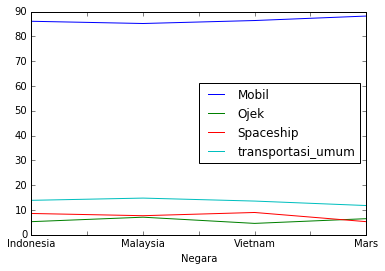

In [20]:
tran.plot()  # plot seluruh kolom

Anda juga dapat melakukan plot satu kolom dalam satu waktu. Tipe plot tersebut dapat ditentukan melalui kata kunci `kind`(tipe awal/*default* plot adalah `'line'`). Tinjaulah `tran.plot?` untuk pilihan-pilihan lain.

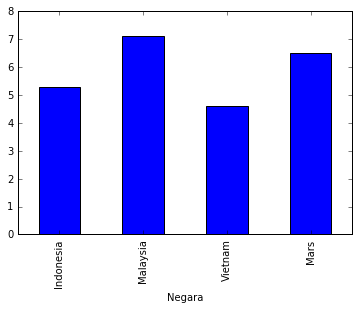

In [22]:
tran['Ojek'].plot(kind='bar')

###Pemilahan (*Sorting*) DataFrame

DataFrame dapat dipilah melalui fungsi `.sort`. Kata kunci `inplace=True` menggantikan nilai dalam DataFrame dengan nilai baru yang telah dipilah (saat `inplace=False` dari DataFrame baru dikembalikan, di mana Anda dapat menyimpannya dalam variabel terpisah sehingga Anda memiliki dua dataset, satu yang telah dipilah dan satu lagi yang masih acak). Fungsi `sort` memiliki beberapa argumen kata kunci, termasuk `columns` yang bukan hanya merupakan nama dari sebuah kolom untuk dipilah tetapi juga sebuah daftar kolom di mana data-datanya telah dipilah oleh kolom yang telah ditentukan pertama kali dan saat nilai-nilai tersebut sama besarnya, tiap nilai dipilah oleh kolom selanjutnya dari daftar kolom yang tersedia. Kata kunci yang lain adalah `ascending`, yang dapat Anda gunakan untuk menyatakan akan melakukan pemilahan secara meningkat (dari nilai terkecil sampai terbesar, `ascending=True`, yang berarti benar secara tipe awal/*default*), atau dari nilai terbesar sampai terkecil (`ascending=False`).

In [24]:
print('Data terpilah untuk penggunaan mobil:')
print(tran.sort(columns='Mobil'))
print('Data terpilah untuk penggunaan ojek:')
print(tran.sort(columns='Ojek'))

Data terpilah untuk penggunaan mobil:
           Mobil  Ojek  Spaceship  transportasi_umum
Negara                                              
Malaysia    85.2   7.1        7.7               14.8
Indonesia   86.1   5.3        8.6               13.9
Vietnam     86.4   4.6        9.0               13.6
Mars        88.2   6.5        5.3               11.8
Data terpilah untuk penggunaan ojek:
           Mobil  Ojek  Spaceship  transportasi_umum
Negara                                              
Vietnam     86.4   4.6        9.0               13.6
Indonesia   86.1   5.3        8.6               13.9
Mars        88.2   6.5        5.3               11.8
Malaysia    85.2   7.1        7.7               14.8


C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


###Latihan 2. <a name="back2"></a>Rata-rata curah hujan tahunan per negara (lanjutan)
Mari kita lanjutkan soal rata-rata curah hujan tahunan dan area lahan total tiap negara di dunia dan lakukan hal berikut:
* Tambahkan satu kolom baru yang akan menyimpan nilai rata-rata arus masuk air tawar in km$^3$/tahun untuk tiap negara. Pastikan Anda mengubah satuannya dengan benar.
* Pilahlah data nilai rata-rata arus masuk air tawar tahunan secara meningkat (dari nilai terkecil sampai terbesar) menggunakan sintaks `.sort` dan laporkan 5 negara dengan arus masuk air tawar tahunan terbesar menggunakan sintaks `iloc`. (Dalam versi IPython terdahulu, nilai-nilai yang hilang dapat dipilah ke dalam bagian atas DataFrame. Untuk menghapus nilai-nilai yang terhilang, ketiklah: `dataframe_name.dropna()`).
* Buatlah satu grafik batang (*bar graph*) dari 10 negara dengan arus masuk air tawar tahunan terbesar.

Negara dengan nilai curah hujan yang hampir sama dengan Belanda
                 hujan    area
negara                        
Burkina Faso     748.0   273.6
Lesotho          788.0    30.4
Mexico           752.0  1944.0
Netherlands      778.0    33.7
Slovak Republic  824.0    48.1
Swaziland        788.0    17.2

Negara dengan arus masuk air hujan terbesar
Brazil 15074.6508 km^3 per tahun

                     hujan     area      totalq
negara                                         
Brazil              1782.0   8459.4  15074.6508
Russian Federation   460.0  16376.9   7533.3740
United States        715.0   9147.4   6540.3910
China                645.0   9327.5   6016.2375
Indonesia           2702.0   1811.6   4894.9432


C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


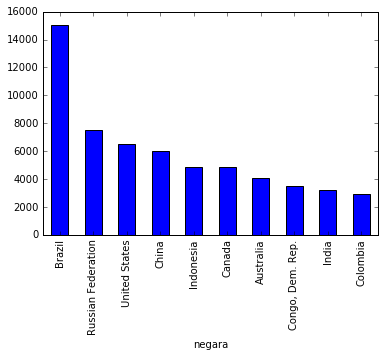

In [28]:
print('Negara dengan nilai curah hujan yang hampir sama dengan Belanda')
print(rain[ abs(rain.loc['Netherlands','hujan'] - rain.hujan) < 50 ])
#
print()
rain['totalq'] = rain.hujan * rain.area * 1e-3
print('Negara dengan arus masuk air hujan terbesar')
print(rain.totalq.argmax(), rain.totalq.max(), 'km^3 per tahun')
#
print()
#rain = rain.hujan()  # Jatuhkan nilai-nilai NaN
rain.sort(columns='totalq',ascending=False,inplace=True)
print(rain[:5])
#
rain.totalq[:10].plot(kind='bar')

###Data seri waktu (*time series*)

Dalam data seri waktu, salah satu kolom merepresentasikan tanggal, terkadang juga termasuk waktunya, yang jika disajikan bersamaan disebut tanggalwaktu (*datetimes*). `pandas` dapat digunakan untuk membaca dokumen .csv di mana salah satu kolom berisikan data tanggalwaktu. Anda perlu memberitahukan `pandas` kolom mana yang berisika nilai tanggalwaktu dan `pandas` akan mencoba mengubah kolom tersebut menjadi objek tanggalwaktu. Objek tanggalwaktu sangat mudah dioperasikan karena spesifikasi objek tersebut dapat dinilai dengan penulisan titik atau *dot syntax*: `.year` mengembalikan nilai tahun, `.month` mengembalikan nilai bulan, dst.

Sebagai contoh, tinjaulah data berikut ini yang telah disimpan dalam dokumen `timeseries1.dat`
`tanggal, conc`  
`2014-04-01, 0.19`   
`2014-04-02, 0.23`   
`2014-04-03, 0.32`   
`2014-04-04, 0.29`   

Dokumen tersebut dapat dibaca dengan `read_csv` menggunakan kata kunci `parse_dates=[0]` sehingga kolom nomor 0 sudah diganti menjadi tanggalwaktu atau *datetimes*.

In [29]:
data = read_csv('timeseries1.dat', parse_dates=[0])
print(data)

        date   conc
0 2014-04-01   0.19
1 2014-04-02   0.23
2 2014-04-03   0.32
3 2014-04-04   0.29
4 2014-04-05   0.32


Baris-baris dari DataFrame `data` sudah diberi nomor, karena kita belum memberitahukan `pandas` sebelumnya kolom manakah yang akan digunakan sebagai indeks dari baris-barisnya. Kolom pertama dari DataFrame `data` memiliki nilai tanggalwaktu. Kita dapat mengakses, sebagai contoh, tanggal, bulan, atau hari dengan penulisan titik atau *dot syntax*.

In [30]:
print('tanggalwaktu dari baris 0:', data.iloc[0,0])
print('tahun dari baris 0:', data.iloc[0,0].year)
print('bulan dari baris 0:', data.iloc[0,0].month)
print('hari dari baris 0:', data.iloc[0,0].day)

tanggalwaktu dari baris 0: 2014-04-01 00:00:00
tahun dari baris 0: 2014
bulan dari baris 0: 4
hari dari baris 0: 1


Data seri waktu juga dapat berisi jam, sebagai tambahan informasi dari tanggal. Sebagai contoh, data dari dokumen `timeseries2.dat`, sebagaimana diperlihatkan di bawah ini, berisi data hari dan jam. Anda tidak hanya dapat mengakses `jam` or `menit`, tetapi juga waktu per baris dari DataFrame melalui fungsi `.time()`.

`tanggal, conc`   
`2014-04-01 12:00:00, 0.19`   
`2014-04-01 13:00:00, 0.20`  
`2014-04-01 14:00:00, 0.23`  
`2014-04-01 15:00:00, 0.21` 

In [31]:
data = read_csv('timeseries2.dat', parse_dates=[0])
print(data)
print('jam dari baris 0:', data.iloc[0,0].hour)
print('menit dari baris 0:', data.iloc[0,0].minute)
print('detik dari baris 0:', data.iloc[0,0].time())

                 date   conc
0 2014-04-01 12:00:00   0.19
1 2014-04-01 13:00:00   0.20
2 2014-04-01 14:00:00   0.23
3 2014-04-01 15:00:00   0.21
jam dari baris 0: 12
menit dari baris 0: 0
detik dari baris 0: 12:00:00


###Latihan 3,  <a name="back3"></a>Memuat dan memplot curah hujan harian

Data curah hujan untuk Belanda dapat diperoleh dari situs Badan Meteorologi Belanda atau *Royal Dutch Meteorological Society* <A href="http://www.knmi.nl/climatology/daily_data/selection.cgi">KNMI</A>. Curah hujan harian untuk stasiun cuaca Rotterdam pada 2012 disimpan dalam dokumen `rotterdam_rainfall_2012.txt`. Pertama, bukalah dokumen dalam editor teks untuk melihat seperti apakah dokumen tersebut. Pada bagian paling atas dokumen, sebuah penjelasan diberikan untuk data di dalam dokumen. Bacalah penjelasan tersebut. Muatlah dokumen data tersebut dengan menggunakan fungsi `read_csv` dari `pandas`. Gunakanlah kata kunci `skiprows` untuk melewatkan seluruh baris kecuali yang berisi nama-nama kolom. Gunakanlah kata kunci `parse_dates` untuk memberikan nama atau nomor kolom yang harus diubah jenisnya menjadi tanggalwaktu. Jangan lupa kata kunci `skipinitialspace`, jika tidak nama-nama kolom dapat dimulai dari sekelompok spasi. Lakukan beberapa hal berikut:
* Beberapa curah hujan dalam dataset mungkin bernilai -1 (bacalah *header* dokumen untuk mencari tahu alasannya); susunlah seluruh nilai curah hujan yang kurang dari nol sampai dengan nol. 
* Gunakan fungsi `plot` dari `pandas` untuk membuat garis plot dari curah hujan harian berikut nomor harinya (bukan tanggal) di sepanjang sumbu horizontal.
* Gunakan fungsi `matplotlib` untuk menambahkan label kepada sumbu-sumbunya dan atur batas di sepanjang sumbu horizontal dari 0 sampai dengan 365.
* Tentukan nilai maksimum dari curah hujan harian dan tanggal curah hujan harian maksimum dan tampilkan data tersebut di layar.

Curah hujan harian maksimum 22.4
Tanggal saat curah hujan harian maksimum 2012-12-22 00:00:00


C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


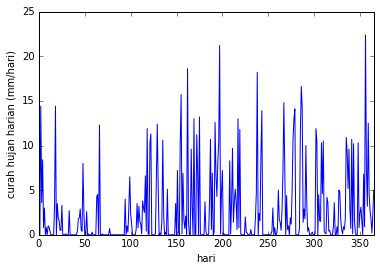

In [32]:
rain = read_csv('rotterdam_rainfall_2012.txt',skiprows=9,
                parse_dates=['YYYYMMDD'],skipinitialspace=True)
rain.iloc[:,2] = rain.iloc[:,2] * 0.1
rain.RH[rain.RH<0] = 0
rain.RH.plot()
plt.xlabel('hari')
plt.ylabel('curah hujan harian (mm/hari)')
plt.xlim(0,365)
print('Curah hujan harian maksimum',rain.RH.max())
print('Tanggal saat curah hujan harian maksimum',rain.YYYYMMDD[rain.RH.argmax()])

###Latihan 4,  <a name="back4"></a>Hitung curah hujan bulanan dari curah hujan harian

Dalam latihan ini kita akan menghitung total curah hujan bulanan tahun 2012 di kota Rotterdam dengan menggunakan pengukuran curah hujan harian yang telah kita muat pada Latihan sebelumnya; selanjutnya pada *Notebook* ini kita belajar fungsi-fungsi mudah dari `pandas` untuk menghitungnya, tetapi saat ini kita akan melakukannya dengan loop. Buat array yang terdiri dari 12 angka nol untuk menyimpan nilai total bulanan dan buat loop yang melalui seluruh hari sepanjang tahun 2012 untuk menghitung sintaks curah hujan total per bulan. Bulan tersebut yang diasosiasikan lewat tiap baris dari DataFrame dapat diperoleh melalui sintaks`.month`, seperti yang terlihat di bawah ini. Tampilkan nilai total bulanan (dalam mm/bulan) ke layar dan buat grafik batang (*bar graph*) dari total curah hujan bulanan (dalam mm/bulan) vs. bulan tersebut dengan menggunakan fungsi `plt.bar` di matplotlib.

[  83.    24.3   21.9   57.6   76.5  119.   121.6   93.4   52.   132.6
   63.3  149.5]


(0, 12)

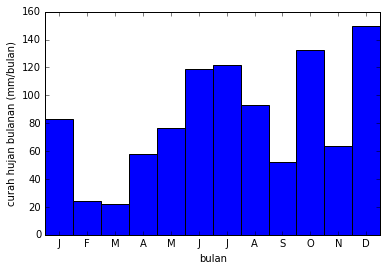

In [33]:
monthlyrain = np.zeros(12)
for i in range(len(rain)):
    month = rain.iloc[i,1].month
    monthlyrain[month-1] += rain.iloc[i,2]
print(monthlyrain)
#
plt.bar(np.arange(12),monthlyrain,width=1)
plt.xlabel('bulan')
plt.ylabel('curah hujan bulanan (mm/bulan)')
plt.xticks(np.arange(12)+0.5,['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim(0,12)

###Tanggalwaktu sebagai indeks

Tanggalwaktu dari dataset dapat digunakan juga sebagai indeks untuk DataFrame dengan cara memperinci kolom dengan tanggal sebagai kolom yang akan digunakan sebagain indeks melalui kata kunci `index_col`. Perhatikan bahwa tanggalwaktu didefinisikan dalam format tahun-bulan-hari, jadi `2012-04-01` berarti 1 April 2012.

In [34]:
data = read_csv('timeseries1.dat', parse_dates=[0], index_col=0)
print(data)
print('data untuk April 1:',data.loc['2014-04-01'])
print('data untuk April 2:',data.loc['2014-04-02'])

             conc
date             
2014-04-01   0.19
2014-04-02   0.23
2014-04-03   0.32
2014-04-04   0.29
2014-04-05   0.32
data untuk April 1:  conc    0.19
Name: 2014-04-01 00:00:00, dtype: float64
data untuk April 2:  conc    0.23
Name: 2014-04-02 00:00:00, dtype: float64


###*Resampling* atau Pengambilan Contoh Ulang

DataFrame memiliki fitur hebat yang disebut percontohan/sampling ulang atau *resampling*. Sampling bawah (*downsampling*) dimulai dari frekuensi tinggi menuju frekuensi rendah. Sebagai contoh, dimulai dari data harian menuju data bulanan. Sampling atas (*upsampling*) dimulai dari frekuensi rendah menuju frekuensi tinggi. Sebagai contoh, dimulai dari data bulanan menuju data harian. Untuk sampling atas dan sampling bawah, Anda perlu memberitahu `pandas` bagaimana melakukan *resampling*. Di sini kita akan mendiskusikan sampling bawah, seperti yang telah kita lakukan pada Latihan 4, di mana kita menghitung nilai total bulanan dari nilai harian. Pertama, kita memuat kembali curah hujan harian di Rotterdam tahun 2012 dan memperinci tanggalnya sebagai indeks. Kita melakukan sampling ulang hujan untuk nilai total bulanan dengan menggunakan fungsi `resample`. Anda harus memberitahukan `resample` untuk membuat sampling ulang dalam frekuensi tertentu. Hal paling umum adalah `'A'` untuk tahunan, `'M'` untuk bulanan, `'W'` untuk mingguan, `'D'` untuk harian, dan `'H'` untuk jam,  tetapi ada juga yang lebih banyak lagi (lihat <A href="http://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html">di sini</A>). Argumen kata kunci `how` digunakan untuk memberitahu `pandas` bagaimana menghitung data contoh yang telah diambil ulang. Kata kunci ini dapat memiliki banyak arti, seperti `'mean'` untuk nilai rata-rata (ini adalah pengaturan dasarnya atau *default*), `'sum'` untuk nilai total, `'min'` untuk nilai terkecil dan `'max'` untuk nilai terbesar, dst. Argumen kata kunci `kind` digunakan untuk memberitahukan `pandas` tempat manakah yang ditetapkan untuk memasukkan nilai yang telah dihitung tersebut. Anda dapat memasukkan nilai yang telah dihitung tersebut sampai hari terakhir dari periode yang sudah ditetapkan, di hari pertama, atau untuk seluruh periode (dalam kasus ini berarti satu bulan penuh). Penggunaan fungsi untuk seluruh period ini dilakukan dengan cara penentuan tempat menggunakan `kind='period'`, yang akan kita lakukan di sini sekarang. Menghitung nilai total bulanan dan membuat grafik batang (*bar graph*) kini dapat dilakukan dengan menggunakan `pandas` seperti berikut ini. Bandingkanlah jawaban-jawaban ini dengan jawaban Anda sebelumnya untuk Latihan 4 dan pastikan Anda mendapatkan jawaban yang benar!

YYYYMMDD
2012-01     83.0
2012-02     24.3
2012-03     21.9
2012-04     57.6
2012-05     76.5
2012-06    119.0
2012-07    121.6
2012-08     93.4
2012-09     52.0
2012-10    132.6
2012-11     63.3
2012-12    149.5
Freq: M, Name: RH, dtype: float64


C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


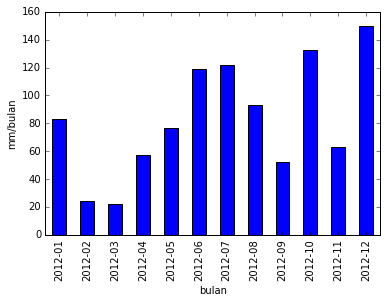

In [35]:
rain = read_csv('rotterdam_rainfall_2012.txt',skiprows=9,
                parse_dates=['YYYYMMDD'],index_col='YYYYMMDD',skipinitialspace=True)
rain.RH[rain.RH<0] = 0
rain.RH = rain.RH * 0.1 # Ubah ke mm/hari
monthlyrain = rain.RH.resample('M', how='sum', kind='period')
print(monthlyrain)
monthlyrain.plot(kind='bar')
plt.ylabel('mm/bulan')
plt.xlabel('bulan')

###Latihan 5,<a name="back5"></a> Pengambilan ulang data cuaca (*resampling*)

Dokumen `rotterdam_weather_2000_2010.txt` berisi data cuaca harian dari stasiun cuaca Rotterdam untuk periode 2000-2010 (diambil dari KNMI). Bukalah dokumen data dari editor untuk melihat data seperti apakah di dalamnya. Kemudian, lakukan hal-hal berikut:
* Muatlah data dan pastikan informasi tanggalnya digunakan sebagai indeks.
* Ubahlah satuan data hujan dan evaporasi menjadi mm/hari, dan temperatur menjadi derajat Celcius.
* Aturlah seluruh data hujan bernilai negatif (sudah dijelaskan dalam dokumen) menjadi bernilai nol.
* Hitunglah nilai total curah hujan tahunan, nilai total evaporasi tahunan, dan nilai rata-rata temperatur tahunan.
* Buatlah grafik (*line plot*) dari curah hujan tahunan, evaporasi tahunan, dan temperatur rata-rata dengan menggunakan fungsi `plot` dari `pandas`. Pastikan bahwa untuk menampilkan nilai temperatur rata-rata dari sumbu-$y$ sekunder (gunakan fungsi bantuan atau *help* untuk mengetahui bagaimana caranya).

C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


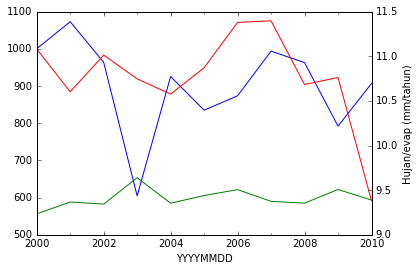

In [36]:
weather = read_csv('rotterdam_weather_2000_2010.txt',skiprows=11,
                parse_dates=['YYYYMMDD'],index_col='YYYYMMDD',skipinitialspace=True)
weather.TG = 0.1 * weather.TG
weather.RH = 0.1 * weather.RH
weather.EV24 = 0.1 * weather.EV24
weather.RH[weather.RH<0] = 0
yearly_rain = weather.RH.resample('A', how='sum', kind='period')
yearly_evap = weather.EV24.resample('A', how='sum', kind='period')
yearly_temp = weather.TG.resample('A', how='mean', kind='period')
yearly_rain.plot()
yearly_evap.plot()
yearly_temp.plot(secondary_y=True)
plt.xlabel('Tahun')
plt.ylabel('Hujan/evap (mm/tahun)')